In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.calibration import calibration_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('max_rows', 5)
%matplotlib inline

# 評価指標

## 分類の評価指標

In [2]:
n_features = 5
x_clf, y_clf = make_classification(n_features=n_features, random_state=1234)
x_reg, y_reg = make_regression(n_features=n_features,
                               noise=0.1,
                               random_state=1234)


def to_dataframe(x, y):
    return pd.DataFrame(np.column_stack([x, y]),
                        columns=[f'$x_{i+1}$' for i in range(x.shape[1])] +
                        ['$y_{true}$'])


x_clf_train, x_clf_test, y_clf_train, y_clf_test = train_test_split(
    x_clf, y_clf, random_state=1234)
clf_train = to_dataframe(x_clf_train, y_clf_train)
print('clf_train')
display(clf_train)
clf_test = to_dataframe(x_clf_test, y_clf_test)
print('clf_test')
display(clf_test)

x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(
    x_reg, y_reg, random_state=1234)
reg_train = to_dataframe(x_reg_train, y_reg_train)
print('reg_train')
display(reg_train)
reg_test = to_dataframe(x_reg_test, y_reg_test)
print('reg_test')
display(reg_test)

clf_train


,$x_1$,$x_2$,$x_3$,$x_4$,$x_5$,$y_{true}$
0,-1.264517,-0.317810,1.192785,2.276830,1.431184,1.0
1,0.909403,0.073113,-0.960346,-1.714961,0.298984,0.0
...,...,...,...,...,...,...
73,-0.948686,-0.893450,0.462831,1.381451,-1.268994,1.0
74,-1.250956,-1.747812,0.234538,1.537458,1.076541,1.0


clf_test


,$x_1$,$x_2$,$x_3$,$x_4$,$x_5$,$y_{true}$
0,0.439331,0.839825,0.066697,-0.427226,-0.660230,0.0
1,-0.397057,0.581005,0.823577,1.054490,-0.061246,1.0
...,...,...,...,...,...,...
23,0.998859,1.101113,-0.381504,-1.374502,0.387674,0.0
24,-0.116642,-1.791178,-1.052071,-0.668758,-0.157099,0.0


reg_train


,$x_1$,$x_2$,$x_3$,$x_4$,$x_5$,$y_{true}$
0,1.384580,1.951103,-0.286425,0.500070,-0.278367,98.163942
1,-0.684128,0.331527,0.599962,-0.217199,-0.383365,-47.749979
...,...,...,...,...,...,...
73,1.015405,0.440266,0.749185,-0.675521,0.688972,162.855411
74,-0.897157,0.755414,-0.136795,0.018289,0.215269,-66.752940


reg_test


,$x_1$,$x_2$,$x_3$,$x_4$,$x_5$,$y_{true}$
0,1.343182,-1.553342,-0.050540,-0.364010,-0.319298,69.510039
1,0.264534,-0.174298,0.565658,0.585084,-1.071369,8.398147
...,...,...,...,...,...,...
23,-0.240483,-1.815558,0.585599,0.352801,-0.910124,-33.476320
24,0.023558,-0.722662,-0.660230,-0.318685,0.177387,-45.749417


### 正確度 (accuracy)
---
正解率のこと。

$
{\displaystyle 正確度=\frac
    {正解数}
    {サンプルサイズ}
}
$

練習問題

---
`clf_pred`データセットを元に、正確度を算出する。

In [3]:
model = LogisticRegression().fit(x_clf, y_clf)
clf_pred = pd.DataFrame({'正解': y_clf, '予測': model.predict(x_clf)})
print('clf_pred')
display(clf_pred)

clf_pred


,正解,予測
0,1,1
1,0,0
...,...,...
98,0,0
99,1,1


解答例

---

In [4]:
sum(clf_pred['正解'] == clf_pred['予測']) / clf_pred['正解'].count()

0.93

---

#### Pythonでの正確度算出方法
---
学習済み分類モデルの`score`メソッドか、`sklearn.metrics.accuracy_score`を使用する。引数に渡す値がそれぞれ異なる。

In [5]:
model_clf = LogisticRegression()
model_clf.fit(x_clf_train, y_clf_train)

LogisticRegression()

In [6]:
help(LogisticRegression.score)

Help on function score in module sklearn.base:

score(self, X, y, sample_weight=None)
    Return the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs)
        True labels for X.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of self.predict(X) wrt. y.



In [7]:
model_clf.score(x_clf_test, y_clf_test)

0.88

In [8]:
help(accuracy_score)

Help on function accuracy_score in module sklearn.metrics._classification:

accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
    Accuracy classification score.
    
    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in y_true.
    
    Read more in the :ref:`User Guide <accuracy_score>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, optional (default=True)
        If ``False``, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
 

In [9]:
y_clf_hat = model_clf.predict(x_clf_test)
accuracy_score(y_clf_test, y_clf_hat)

0.88

## 回帰の評価指標
---
分類モデルに比べると問題ごとに異なる指標を選んだり、自分で設計する必要性が高い。

### 決定係数 $\left( R^{2}\right)$
---
$
\displaystyle R^{2} =1-\frac
    {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}}
    {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}
$

回帰分析では決定係数 $R^2$ は (重) 相関係数の二乗と一致していたが、それ以外のモデルではそのような一致は見られない。この場合、単に**正解ラベルの分散をどれくらいうまく捕捉できているかの指標**に過ぎず、値がマイナスになることもある。

#### Pythonでの決定係数算出方法
---
学習済み回帰モデルの`score`メソッドか、`sklearn.metrics.r2_score`を使用する。

In [10]:
model_reg = LinearRegression()
model_reg.fit(x_reg_train, y_reg_train)

LinearRegression()

In [11]:
help(LinearRegression.score)

Help on function score in module sklearn.base:

score(self, X, y, sample_weight=None)
    Return the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a
        precomputed kernel matrix or a list of generic objects instead,
        shape = (n_samples, n_samples_fitted),
        where n_samples_fitted is the number of
        samples used in the fitting for the estimator.
    
    y : array-like of shape (n

In [12]:
model_reg.score(x_reg_test, y_reg_test)

0.9999988051140659

In [13]:
help(r2_score)

Help on function r2_score in module sklearn.metrics._regression:

r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
    R^2 (coefficient of determination) regression score function.
    
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Read more in the :ref:`User Guide <r2_score>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), optional
        Sample weights.
    
    multioutput : string in ['raw_values', 'uniform_average', 'variance_weighted'] or None or array-like of shape (n_outputs)
    

In [14]:
y_reg_hat = model_reg.predict(x_reg_test)
r2_score(y_reg_test, y_reg_hat)

0.9999988051140659

### 平均二乗誤差 (MSE, Mean Squared Error)
---
残差の二乗の平均。  
最小二乗法の場合、 $\overline{e} =0$ より残差の分散に等しい。

$
\displaystyle \begin{aligned}
    MSE & =\frac
        {\displaystyle \sum ^{n}_{i=1} e^{2}_{i}}
        {n}
    \\
     & \\
     & =\frac
         {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}}
         {n}
\end{aligned}
$

元の $y$ とスケールを揃える場合、平均二乗誤差の平方根 (RMSE, Root Mean Squared Error) を使用することもある。  
最小二乗法の場合、残差の標準偏差に等しい。

$\displaystyle RMSE=\sqrt{MSE}$

練習問題

---
`reg_pred`データセットを元に、平均二乗誤差を算出する。

In [15]:
model = LinearRegression().fit(x_reg, y_reg)
reg_pred = pd.DataFrame({'正解': y_reg, '予測': model.predict(x_reg)})
print('reg_pred')
display(reg_pred)

reg_pred


,正解,予測
0,-88.673382,-88.683914
1,151.441869,151.389445
...,...,...
98,-332.315818,-332.225865
99,100.990582,100.988929


解答例

---

In [16]:
np.mean((reg_pred['正解'] - reg_pred['予測'])**2)

0.010575141915502967

---

#### Pythonでの平均二乗誤差算出方法
---
`sklearn.metrics.mean_squared_error`を使用する。

In [17]:
help(mean_squared_error)

Help on function mean_squared_error in module sklearn.metrics._regression:

mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)
    Mean squared error regression loss
    
    Read more in the :ref:`User Guide <mean_squared_error>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), optional
        Sample weights.
    
    multioutput : string in ['raw_values', 'uniform_average']
        or array-like of shape (n_outputs)
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
    
        'raw_values' :
            Returns a full set of errors in case of multioutput input.
    
        'uniform_average' :

In [18]:
mean_squared_error(y_reg_test, y_reg_hat)

0.01642733446295104

### 平均絶対誤差 (MAE, Mean Absolute Error)
---
残差の絶対値の平均。平均二乗誤差より外れ値に影響されにくい。

$
\displaystyle \begin{aligned}
    MAE & =\frac
        {\displaystyle \sum ^{n}_{i=1} |e|}
        {n}\\
     & \\
     & =\frac
         {\displaystyle \sum ^{n}_{i=1}\left| y_{i} -\hat{y}_{i}\right|}
         {n}
\end{aligned}
$

練習問題

---
`reg_pred`データセットを元に、平均絶対誤差を算出する。

解答例

---

In [19]:
np.abs(reg_pred['正解'] - reg_pred['予測']).mean()

0.07835245094121417

---

#### Pythonでの平均絶対誤差算出方法
---
`sklearn.metrics.mean_absolute_error`を使用する。

In [20]:
help(mean_absolute_error)

Help on function mean_absolute_error in module sklearn.metrics._regression:

mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
    Mean absolute error regression loss
    
    Read more in the :ref:`User Guide <mean_absolute_error>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), optional
        Sample weights.
    
    multioutput : string in ['raw_values', 'uniform_average']
        or array-like of shape (n_outputs)
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
    
        'raw_values' :
            Returns a full set of errors in case of multioutput input.
    
        'uniform_average' :
         

In [21]:
mean_absolute_error(y_reg_test, y_reg_hat)

0.11062328717271676

## グラフによる評価

### 残差プロット
---
視覚的にモデルが捉えきれていない特徴がないか確認する手法。  
横軸に予測値・縦軸に残差をとった散布図。  
正解 (縦軸が0の水平線) の周辺にランダムに予測値が分布しているのが理想的。誤差に規則性がある場合は、何らかの特徴を補足しきれていない可能性がある。

下図は $y=x^{3}$ の分布からサンプリングしたデータに線形回帰を実行したときの残差プロット。

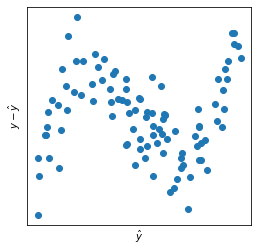

In [22]:
from my_functions.metrics import residual_plot
residual_plot.show()

練習問題

---
`reg_train`データセットに線形回帰を適用し、残差プロットを表示する。

解答例

---

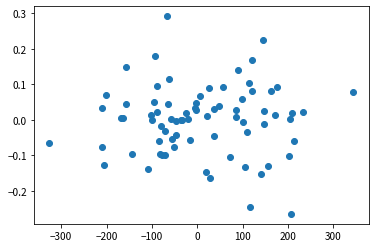

In [23]:
dataset = reg_train.values
y_reg_hat_train = LinearRegression().fit(dataset[:, :-1],
                                         dataset[:,
                                                 -1]).predict(dataset[:, :-1])
plt.scatter(y_reg_hat_train, y_reg_train - y_reg_hat_train)
plt.show()

---

#### Pythonでの残差プロット表示方法

##### 残差
---
自分で残差を算出・描画するか、`yellowbrick.regressor.ResidualsPlot`を使用する。 (yellowbrickはインポートするとmatplotlibの設定を書き換えて日本語が文字化けするので注意)

使用例

```python
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(x_reg_train, y_reg_train)
visualizer.score(x_reg_test, y_reg_test)
```

##### 逸脱残差(deviance residuals)
---
一般化線形モデルでは、 (対数) 尤度を利用した逸脱残差を利用する。  
逸脱残差は`statsmodels.genmod.generalized_linear_model.GLM`で推定したモデルの`resid_deviance`プロパティで取得可能。

In [24]:
dataset = sm.datasets.star98
star98 = dataset.load(as_pandas=True).data
print('star98')
display(star98)
print(dataset.DESCRLONG)
print(dataset.NOTE)

star98


,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,...,PCTCHRT,PCTYRRND,PERMINTE_AVYRSEXP,PERMINTE_AVSAL,AVYRSEXP_AVSAL,PERSPEN_PTRATIO,PERSPEN_PCTAF,PTRATIO_PCTAF,PERMINTE_AVYRSEXP_AVSAL,PERSPEN_PTRATIO_PCTAF
0,452.0,355.0,34.39730,23.299300,14.235280,11.411120,15.918370,14.70646,59.15732,4.445207,...,0.0,22.22222,234.102872,941.68811,869.9948,96.50656,253.52242,1238.1955,13848.8985,5504.0352
1,144.0,40.0,17.36507,29.328380,8.234897,9.314884,13.636360,16.08324,59.50397,5.267598,...,0.0,0.00000,219.316851,811.41756,957.0166,107.68435,340.40609,1321.0664,13050.2233,6958.8468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,199.0,510.0,70.62104,20.461720,2.989345,17.423050,11.032860,16.56420,61.70566,3.970984,...,0.0,13.63636,182.750500,680.78991,1022.1049,98.82377,60.13205,376.8523,11276.7402,1496.4746
302,72.0,84.0,77.74827,5.998899,9.576225,11.117230,7.874016,16.91871,65.09957,6.913397,...,0.0,0.00000,133.218193,512.59506,1101.4007,138.49276,162.66815,471.3534,8672.4471,3258.6530



This data is on the California education policy and outcomes (STAR program
results for 1998.  The data measured standardized testing by the California
Department of Education that required evaluation of 2nd - 11th grade students
by the the Stanford 9 test on a variety of subjects.  This dataset is at
the level of the unified school district and consists of 303 cases.  The
binary response variable represents the number of 9th graders scoring
over the national median value on the mathematics exam.

The data used in this example is only a subset of the original source.

::

    Number of Observations - 303 (counties in California).

    Number of Variables - 13 and 8 interaction terms.

    Definition of variables names::

        NABOVE   - Total number of students above the national median for the
                   math section.
        NBELOW   - Total number of students below the national median for the
                   math section.
        LOWINC   - Percentage of low income stu

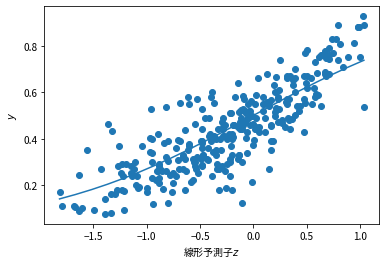

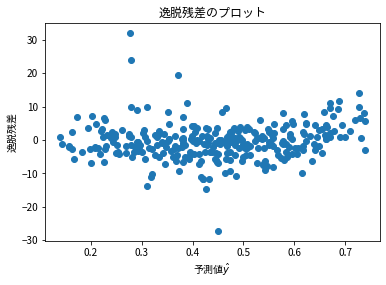

In [25]:
logit_model = sm.GLM(star98[['NABOVE', 'NBELOW']],
                     sm.add_constant(star98['LOWINC']),
                     family=sm.families.Binomial()).fit()
z = logit_model.family.link(logit_model.mu)
xx = np.linspace(z.min(), z.max(), 20)
yy = logit_model.family.link.inverse(xx)
# 線形予測子と目的変数の関係
plt.plot(xx, yy)
plt.scatter(z, star98['NABOVE'] / (star98['NABOVE'] + star98['NBELOW']))
plt.xlabel('線形予測子$z$')
plt.ylabel('$y$')
plt.show()
# 予測値と逸脱残差の関係
plt.title('逸脱残差のプロット')
plt.scatter(logit_model.mu, logit_model.resid_deviance)
plt.xlabel(r'予測値$\hat{y}$')
plt.ylabel('逸脱残差')
plt.show()

練習問題

---
`road`データセットに対して、`deaths`を目的変数・その他を説明変数にしてポアソン回帰を適用し、逸脱残差のプロットを表示する。

In [26]:
road = sm.datasets.get_rdataset('road', 'MASS').data
print('road')
display(road)

road


,deaths,drivers,popden,rural,temp,fuel
Alabama,968,158,64.0,66.0,62,119.0
Alaska,43,11,0.4,5.9,30,6.2
...,...,...,...,...,...,...
Mo,1289,234,63.0,100.0,40,180.0
Mont,259,38,4.6,72.0,29,31.0


解答例

---

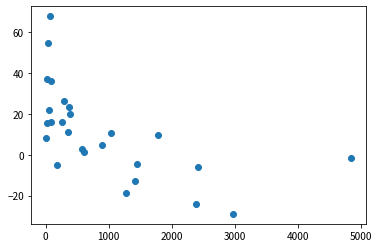

In [27]:
poisson = sm.GLM(road['deaths'],
                 road[[c for c in road.columns if c != 'deatths']],
                 family=sm.families.Poisson()).fit()
plt.scatter(poisson.mu, poisson.resid_deviance)
plt.show()

---

### Q-Qプロット
---
ある変数に何らかの分布を仮定している場合に、実際にその分布に適合しているか確認する手法。  
横軸に想定する分布からの分位点 (パーセント点) 、縦軸に変数からのサンプルの分位点をとった散布図。  
主に残差が正規分布に従っているかを確認するのに利用する。  
左下から右上へ一直線に並ぶのが理想的。

下図は横軸が正規分布、縦軸が指数分布の場合の Q-Q プロット。

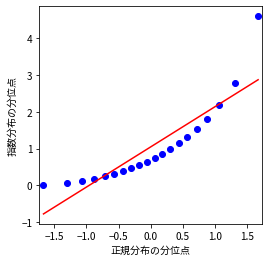

In [28]:
from my_functions.metrics import qqplot
qqplot.show()

練習問題

---
`reg_train`に線形回帰を適用し、`reg_train`・`reg_test`に対する予測との残差と正規分布をそれぞれ比較した Q-Q プロットを表示する。

解答例

---

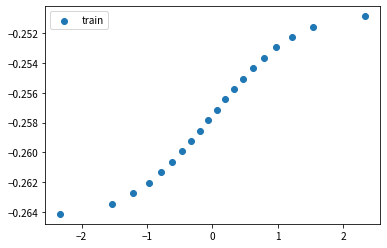

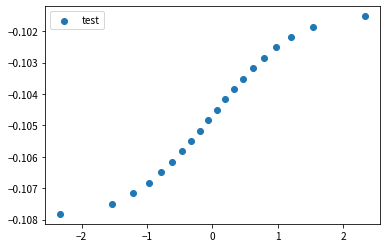

In [29]:
model_reg = LinearRegression()
model_reg.fit(x_reg_train, y_reg_train)

p = np.linspace(0.01, 0.99, 20)
resid_train = y_reg_train - model_reg.predict(x_reg_train)
plt.scatter(norm.ppf(p), np.percentile(resid_train, p), label='train')
plt.legend()
plt.show()
resid_test = y_reg_test - model_reg.predict(x_reg_test)
plt.scatter(norm.ppf(p), np.percentile(resid_test, p), label='test')
plt.legend()
plt.show()

---

#### PythonでのQ-Qプロット表示方法
---
`statsmodels.graphics.gofplots.qqplot`を使用する。

In [30]:
longley = sm.datasets.longley.load_pandas().data
print('longley')
display(longley)

longley


,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
...,...,...,...,...,...,...,...
14,69331.0,115.7,518173.0,4806.0,2572.0,127852.0,1961.0
15,70551.0,116.9,554894.0,4007.0,2827.0,130081.0,1962.0


In [31]:
help(sm.qqplot)

Help on function qqplot in module statsmodels.graphics.gofplots:

qqplot(data, dist=<scipy.stats._continuous_distns.norm_gen object at 0x7f5db6a523a0>, distargs=(), a=0, loc=0, scale=1, fit=False, line=None, ax=None, **plotkwargs)
    Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
    
    Can take arguments specifying the parameters for dist or fit them
    automatically. (See fit under Parameters.)
    
    Parameters
    ----------
    data : array_like
        A 1d data array.
    dist : callable
        Comparison distribution. The default is
        scipy.stats.distributions.norm (a standard normal).
    distargs : tuple
        A tuple of arguments passed to dist to specify it fully
        so dist.ppf may be called.
    a : float
        Offset for the plotting position of an expected order statistic, for
        example. The plotting positions are given by (i - a)/(nobs - 2*a + 1)
        for i in range(0,nobs+1)
    loc : float
        Location par

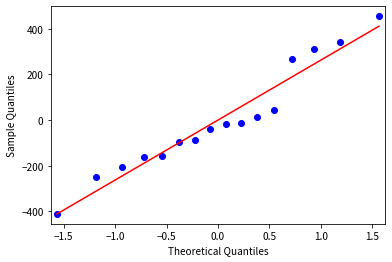

In [32]:
fitted_model = sm.OLS(longley['TOTEMP'], sm.add_constant(longley.iloc[:, 1:])).fit()
sm.qqplot(fitted_model.resid, line='r')
plt.show()

### calibration curve
---
モデルが出力した0~1の範囲の値を、確率として扱って良いか確認する手法。  
予測値 $\hat{y}$ を横軸にとって複数の区間に分割し、それぞれの区間で正解ラベル $y$ の割合を縦軸にとった折れ線グラフ。  
予測値が正解ラベルに属する確率を表しているとすると、理想的には左下から右上を結ぶ直線になる。

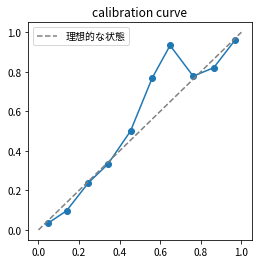

In [33]:
from my_functions.metrics import plot_calibration_curve
plot_calibration_curve.show()

練習問題

---
`clf_train`データセットにロジスティック回帰を適用し、 calibration curve を表示する。

In [34]:
print('clf_train')
display(clf_train)

clf_train


,$x_1$,$x_2$,$x_3$,$x_4$,$x_5$,$y_{true}$
0,-1.264517,-0.317810,1.192785,2.276830,1.431184,1.0
1,0.909403,0.073113,-0.960346,-1.714961,0.298984,0.0
...,...,...,...,...,...,...
73,-0.948686,-0.893450,0.462831,1.381451,-1.268994,1.0
74,-1.250956,-1.747812,0.234538,1.537458,1.076541,1.0


解答例

---

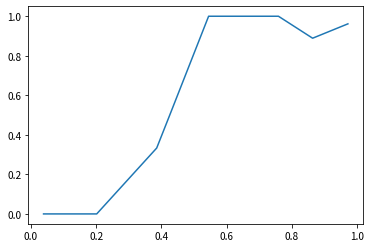

In [35]:
model_clf = LogisticRegression().fit(x_clf_train, y_clf_train)
y_hat = model_clf.predict_proba(x_clf_train)[:, 1]
idx = np.argsort(y_hat)
y_true = y_clf_train[idx]
y_pred = y_hat[idx]
x = []
y = []
for thresh in np.arange(0, 1, 0.1):
    condition = (thresh <= y_pred) & (y_pred < thresh+0.1)
    x.append(np.mean(y_pred[condition]))
    y.append(np.mean(y_true[condition]))
plt.plot(x, y)
plt.show()

---

#### Pythonでのcalibration curve表示方法
---
`sklearn.calibration.calibration_curve`を使用する。

In [36]:
help(calibration_curve)

Help on function calibration_curve in module sklearn.calibration:

calibration_curve(y_true, y_prob, normalize=False, n_bins=5, strategy='uniform')
    Compute true and predicted probabilities for a calibration curve.
    
    The method assumes the inputs come from a binary classifier, and
    discretize the [0, 1] interval into bins.
    
    Calibration curves may also be referred to as reliability diagrams.
    
    Read more in the :ref:`User Guide <calibration>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        True targets.
    
    y_prob : array-like of shape (n_samples,)
        Probabilities of the positive class.
    
    normalize : bool, default=False
        Whether y_prob needs to be normalized into the [0, 1] interval, i.e.
        is not a proper probability. If True, the smallest value in y_prob
        is linearly mapped onto 0 and the largest one onto 1.
    
    n_bins : int, default=5
        Number of bins to discretize th

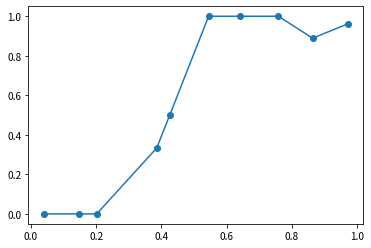

In [37]:
model_clf = LogisticRegression().fit(x_clf_train, y_clf_train)
y_hat = model_clf.predict_proba(x_clf_train)[:, 1]
yy, xx = calibration_curve(y_clf_train, y_hat, n_bins=10)
plt.plot(xx, yy, marker='o')
plt.show()

## 推薦図書
---
- [Kaggleで勝つデータ分析の技術](https://www.amazon.co.jp/Kaggle%E3%81%A7%E5%8B%9D%E3%81%A4%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%E3%81%AE%E6%8A%80%E8%A1%93-%E9%96%80%E8%84%87-%E5%A4%A7%E8%BC%94/dp/4297108437/)
- [Python 機械学習プログラミング 達人データサイエンティストによる理論と実践](https://www.amazon.co.jp/Python-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0-%E9%81%94%E4%BA%BA%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%83%86%E3%82%A3%E3%82%B9%E3%83%88%E3%81%AB%E3%82%88%E3%82%8B%E7%90%86%E8%AB%96%E3%81%A8%E5%AE%9F%E8%B7%B5-impress-gear/dp/4295003379/)